In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dt1 = pd.read_csv('ex2data1.txt', header=None)

In [3]:
dt1.columns = ['Weight', 'Height', 'Cancer']
dt1.head()

,Weight,Height,Cancer
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
dt1.describe()

,Weight,Height,Cancer
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


## Height and Weight, how affect to probability to predict Cancer


In [5]:
dt1.groupby('Cancer', as_index = False).mean()

,Cancer,Weight,Height
0,0,52.032301,54.620392
1,1,74.718923,73.956402


## Whether the distribution of the data follows Gaussian's rule, isn't it ?
> Use hist, scatter, distplot or jointplot to see the distribution

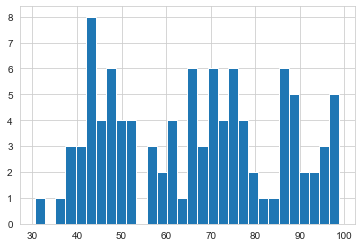

In [6]:
sns.set_style('whitegrid')
dt1['Height'].hist(bins = 30)

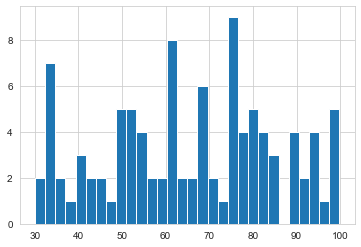

In [7]:
dt1['Weight'].hist(bins = 30)

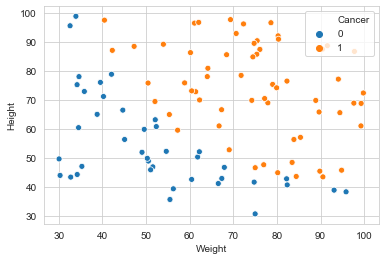

In [8]:
sns.scatterplot(x= 'Weight', y= 'Height', data = dt1, hue = 'Cancer')

In [9]:
X = dt1.iloc[:, :2]
y = dt1.iloc[:, 2]

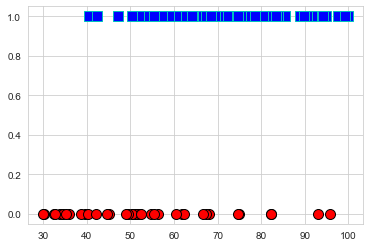

In [10]:
# sample Weight = 0 in Cancer
X0 = dt1[dt1['Cancer'] == 0].iloc[:, 0]
y0 = dt1[dt1['Cancer'] == 0].iloc[:, 2]
## Weight = 1 in Cancer
X1 = dt1[dt1['Cancer'] == 1].iloc[:, 0]
y1 = dt1[dt1['Cancer'] == 1].iloc[:, 2]
plt.plot(X0, y0, 'ro', markersize = 10, mec = 'k')
plt.plot(X1, y1, 'bs', markersize = 10, mec= 'c')

Text(0.5, 0, 'Height')

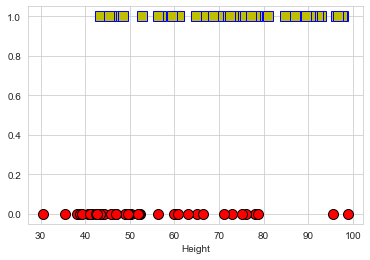

In [11]:
# sample Height = 0 in Cancer
X0 = dt1[dt1['Cancer'] == 0].iloc[:, 1]
y0 = dt1[dt1['Cancer'] == 0].iloc[:, 2]
## Height = 1 in Cancer
X1 = dt1[dt1['Cancer'] == 1].iloc[:, 1]
y1 = dt1[dt1['Cancer'] == 1].iloc[:, 2]
#
plt.plot(X0, y0, 'ro', markersize = 10, mec = 'k')
plt.plot(X1, y1, 'ys', markersize = 10, mec = 'b')
#
plt.xlabel('Height')

## Training 

In [13]:
def sigmoid(X, theta):
    return 1/(1+np.exp(-(X @ theta)))

In [14]:
def computeCost(X, y, theta, sig):
    cost = -y.T @ np.exp(sig) - (1 - y).T @ np.exp(1-sig)
    return cost / (float(len(y)))

In [15]:
X = dt1.iloc[:, :2]
y = dt1.iloc[:,2].to_numpy(dtype = float).reshape(-1, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)
X_norm= np.append(arr = np.ones((len(dt1),1)), values = X_norm, axis =  1)


In [18]:
theta = np.zeros((X.shape[1] + 1, 1))
iters = 1000
alpha = 0.01
cost = np.zeros((1, iters)) 

In [19]:
# fit 
cost = np.zeros((iters, 1))
m = float(len(y))
for i in range(iters):
    sigma = sigmoid(X_norm, theta)
    theta = theta - (alpha / m) * X_norm.T @ (sigma - y)
    cost[i] = computeCost(X_norm, y, theta, sigma)

In [20]:
theta

array([[-0.07079551],
       [ 0.67489979],
       [ 0.58497356]])

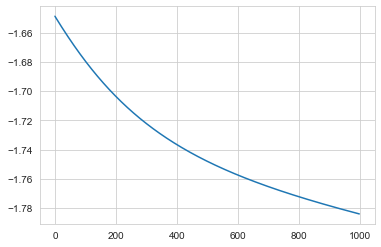

In [36]:
plt.plot(cost)

# Used framework sklearn

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
X_k = dt1.iloc[:, :2]
y_k = dt1['Cancer']

In [25]:
lgmodel = LogisticRegression()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_k, y_k, test_size=0.3, random_state=0)

In [27]:
norm_train = MinMaxScaler().fit(X_train)
norm_test = MinMaxScaler().fit(X_test)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [28]:
lgmodel.fit(X_train_norm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
pred = lgmodel.predict(X_test_norm)

In [30]:
pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.95      0.95      0.95        19

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [33]:
lgmodel.coef_

array([[2.67705763, 2.26372788]])

In [34]:
lgmodel.intercept_

array([-2.16385953])